# Imports

In [30]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from mlxtend.plotting import plot_decision_regions

# Loading the datasets

In [6]:
iris = load_iris(as_frame=True)
X, y = iris.data, iris.target

# Taking only two features: petal length & petal width

In [17]:
X = X[['petal length (cm)', 'petal width (cm)']]
X.head(3)

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2


In [25]:
y = (iris.target == 2).astype(int)

# Fitting the model

In [31]:
svm_clf = make_pipeline(StandardScaler(), LinearSVC(C = 1.0, random_state=42))

In [32]:
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=42))])

In [54]:
X_new = np.array([[5.5, 1.7], [5.0, 1.5], [5.0, 1.3], [6.7, 1.0]])
X_new

array([[5.5, 1.7],
       [5. , 1.5],
       [5. , 1.3],
       [6.7, 1. ]])

In [55]:
X_new.shape

(4, 2)

In [56]:
svm_clf.predict(X_new)

/Users/anilthapa/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1, 0, 0, 1])

# Plotting the decision boundary

/var/folders/b3/2_by4h4x5vj2swvvx86hmbw00000gn/T/ipykernel_48484/1833798272.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  fig = plot_decision_regions(clf=svm_clf, X = X.to_numpy(), y = y.ravel())
/Users/anilthapa/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


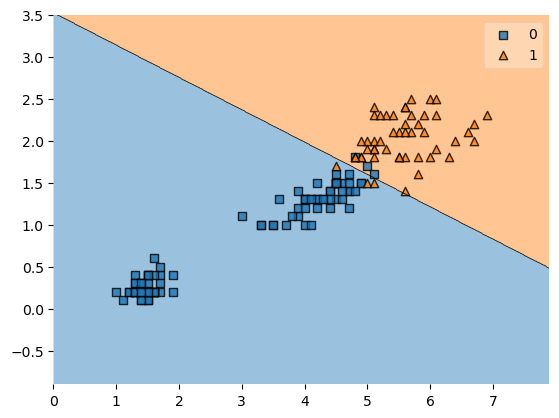

In [61]:
fig = plot_decision_regions(clf=svm_clf, X = X.to_numpy(), y = y.ravel())
plt.show()

# Linear SVM for three different values of C: 1, 50, 100

In [84]:
classifiers = [make_pipeline(StandardScaler(), LinearSVC(C = _, random_state=42)) for _ in (1.0, 50.0, 100.0)]

/var/folders/b3/2_by4h4x5vj2swvvx86hmbw00000gn/T/ipykernel_48484/709227950.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  plot_decision_regions(clf=classifier, X = X.to_numpy(), y = y.ravel(), ax = ax)
/Users/anilthapa/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/anilthapa/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/var/folders/b3/2_by4h4x5vj2swvvx86hmbw00000gn/T/ipykernel_48484/709227950.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  plot_decision_regions(clf=classifier, X = X.to

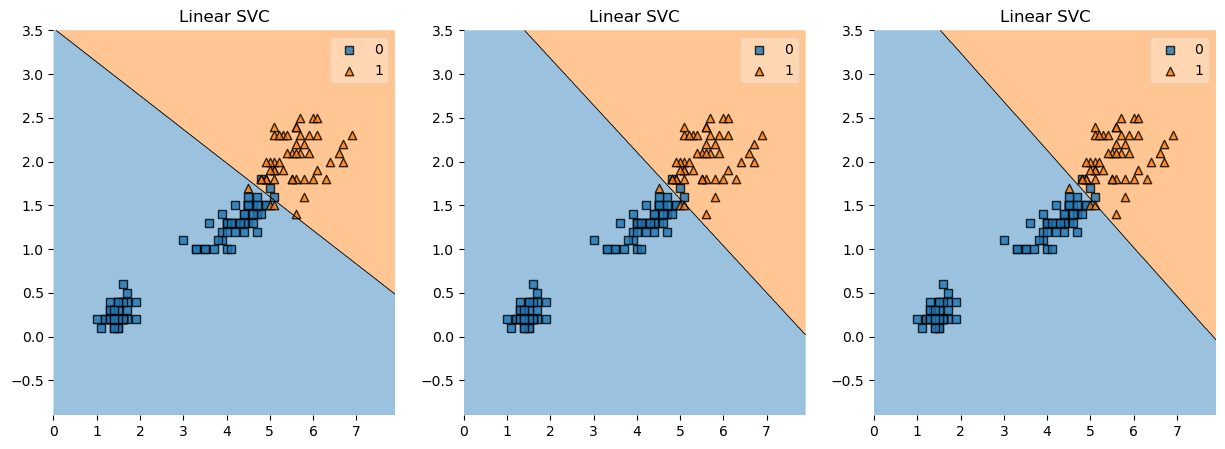

In [88]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5), sharey=True)
for classifier, ax in zip(classifiers, axes):
    classifier.fit(X, y)
    plot_decision_regions(clf=classifier, X = X.to_numpy(), y = y.ravel(), ax = ax)
    ax.set_title(f'Linear SVC')

plt.show()